In [45]:
from graphviz import Graph as Ggraph
from graphviz import Digraph

In [46]:
class Graph:
    def __init__(self, vertices):
        self.V = vertices
        self.graph = []
        self.res = []
        
    def make_graph(self):
        dot = Ggraph(format='svg',graph_attr={'rankdir':'LR'})
        for node in self.graph:
            dot.node(str(node[0]),str(node[0]))
        for s in self.graph:
            dot.edge(str(s[0]),str(s[1]),label=str(s[2]))
        return dot

    def addEdge(self, src, dest, weight):
        self.graph.append([src, dest, weight])

    def find(self, parent, i):
        if parent[i] != i:
            parent[i] = self.find(parent, parent[i])
        return parent[i]

    def union(self, parent, rank, x, y):
        if rank[x] < rank[y]:
            parent[x] = y
        elif rank[x] > rank[y]:
            parent[y] = x
        else:
            parent[y] = x
            rank[x] += 1
    
    def make_mst(self):
        dot = Ggraph(format='svg',graph_attr={'rankdir':'LR'})
        for node in self.res:
            dot.node(str(node[0]),str(node[0]))
        for s in self.res:
            dot.edge(str(s[0]),str(s[1]),label=str(s[2]))
        return dot

    def KruskalMST(self):
        i = 0
        e = 0
        self.graph = sorted(self.graph, key=lambda x: x[2])
        parent = [i for i in range(self.V)]
        rank = [0] * self.V
        while e < self.V - 1:
            u, v, w = self.graph[i]
            i += 1
            x = self.find(parent, u)
            y = self.find(parent, v)
            if x != y:
                e += 1
                self.res.append([u, v, w])
                self.union(parent, rank, x, y)
        minCost = 0
        for u, v, weight in self.res:
            minCost += weight
            print(f"{u} -> {v} = {weight}")
        print("Minimum Spanning Tree", minCost)

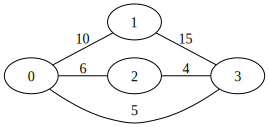

In [47]:
g = Graph(4) 
g.addEdge(0, 1, 10) 
g.addEdge(0, 2, 6) 
g.addEdge(0, 3, 5) 
g.addEdge(1, 3, 15) 
g.addEdge(2, 3, 4)
g.make_graph() 

2 -> 3 = 4
0 -> 3 = 5
0 -> 1 = 10
Minimum Spanning Tree 19


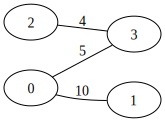

In [48]:
g.KruskalMST()
g.make_mst()